In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [86]:
# Import necessary library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
social = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [88]:
social.shape

(400, 5)

In [89]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [90]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


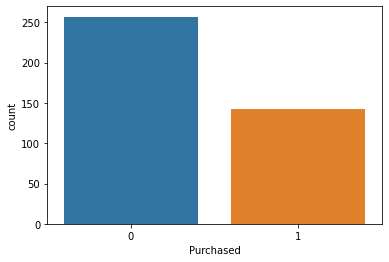

In [91]:
sns.countplot(x='Purchased', data=social)
plt.show()

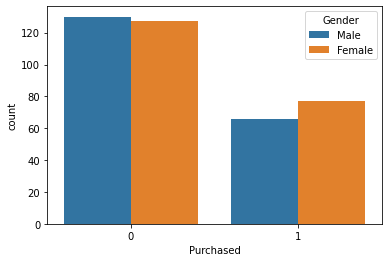

In [92]:
sns.countplot(x='Purchased', data=social, hue='Gender')
plt.show()

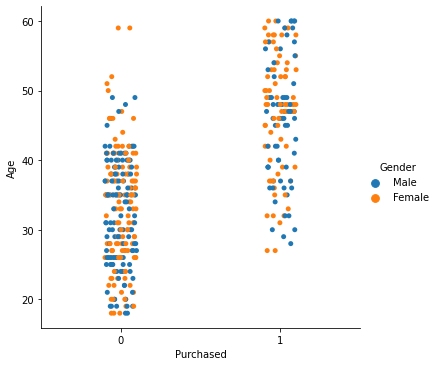

In [93]:
sns.catplot(x='Purchased', y='Age', data=social, hue='Gender')
plt.show()

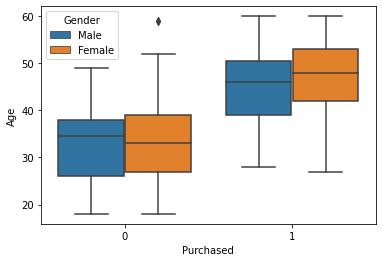

In [94]:
sns.boxplot(x='Purchased', y='Age', data=social, hue='Gender')
plt.show()

# Data Preprocessing

In [95]:
# Drop uncessary columns
social.drop(columns=['User ID'], axis=1, inplace=True)

In [103]:
# Converting Gender into Dummy Data
social.drop(columns=['Gender'], axis=1, inplace=True)

# Extracting Feature

In [104]:
X = social.iloc[:, :-1].values 
y = social.iloc[:, -1].values

In [ ]:
# Feature Scaling

In [105]:
social.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Feature Scaling

In [106]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [107]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
# Spliting data into training and testing

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [109]:
poly_model = SVC(kernel='poly', degree=3)
poly_model.fit(X_train, y_train)

SVC(kernel='poly')

In [110]:
poly_model.score(X_train, y_train)

0.8392857142857143

In [111]:
poly_model.score(X_test, y_test)

0.85

In [112]:
poly_model.predict(ss.transform([[1,19]]))

array([0])

In [113]:
y_pred_poly = poly_model.predict(X_test)

<AxesSubplot:>

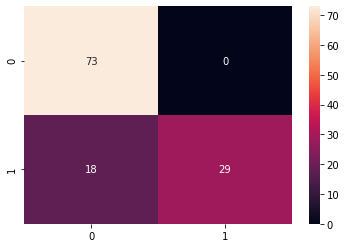

In [114]:
cf_matrix = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cf_matrix, annot=True)

In [115]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        73
           1       1.00      0.62      0.76        47

    accuracy                           0.85       120
   macro avg       0.90      0.81      0.83       120
weighted avg       0.88      0.85      0.84       120



In [116]:
# Using RBF Kernel
rbf_model = SVC(kernel='rbf').fit(X_train, y_train)

In [117]:
# Score on test data
rbf_model.score(X_test, y_test)

0.9333333333333333

In [118]:
rbf_model.score(X_train, y_train)

0.9

In [119]:
rbf_model.predict(ss.transform([[0,26]]))

array([1])

In [120]:
y_pred_rbf = rbf_model.predict(X_test)

<AxesSubplot:>

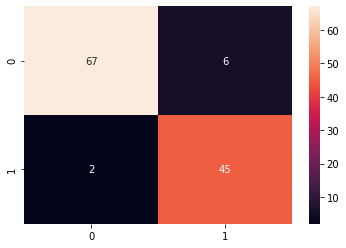

In [121]:
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True)

In [122]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        73
           1       0.88      0.96      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [ ]:
# Random Forest Classifier

In [123]:
rf_clf = RandomForestClassifier(max_depth=4)

In [124]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [125]:
rf_clf.score(X_test, y_test)

0.9416666666666667

In [126]:
rf_clf.score(X_train, y_train)

0.9107142857142857

In [127]:
y_pred_rf = rf_clf.predict(X_test)

<AxesSubplot:>

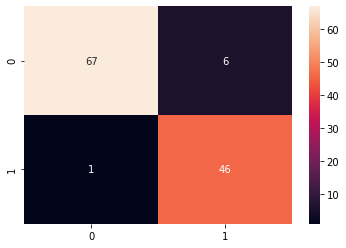

In [128]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

In [129]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        73
           1       0.88      0.98      0.93        47

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



In [ ]:
# Decision Tree Classifier

In [130]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [131]:
dt_clf.score(X_train, y_train)

0.9071428571428571

In [132]:
dt_clf.score(X_test, y_test)

0.9333333333333333

In [133]:
y_pred_dt = dt_clf.predict(X_test)

<AxesSubplot:>

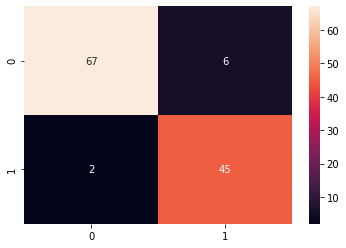

In [134]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)

In [135]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        73
           1       0.88      0.96      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120

